<a href="https://colab.research.google.com/github/FauzanMJ25/FauzanMJ_TugasMachineLearning/blob/main/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# penjelaskan Naive Bayes

Algoritma Naive Bayes (NB) adalah metode yang menggunakan prinsip probability utk membuat model prediksi klasifikasi.

Keunggulan NB adalah sifatnya yg efektif dan cepat utk mengolalh data berjumblah besar.

## Bagaimana Naive Bayes Bekerja

NB adalah sekumpulan (bukan hanya satu) algoritma klasifikasi yg dibangun berdasarkan Teori Bayes.

Model klasifikasi yg memakai metode bayes memanfaatkan training dataset utk menghitung kemungkinan setiap kelas berdasarkan nilai-nilai feature di dalamnya.

conditional probability yaitu kemungkinan munculnya suatu kejadian A bila suatu kejadian B muncul. Karena kejadian A bergantung kpd kejadian B, itu sebabnya disebut conditional(bersyarat).

Posterior probability (probabilitas posterior) adalah probabilitas suatu kejadian atau hipotesis setelah memiliki informasi baru atau bukti yang dapat mempengaruhi probabilitas tersebut. Dalam statistika dan teori probabilitas, posterior probability diperoleh dengan menggunakan Teorema Bayes, yaitu sebuah formula matematika yang menghubungkan probabilitas posterior dengan probabilitas prior (probabilitas sebelumnya) dan likelihood (kemungkinan suatu data di bawah hipotesis tertentu).

Secara sederhana, posterior probability dapat diartikan sebagai "probabilitas suatu hipotesis setelah melihat data baru". Misalnya, kita ingin mengetahui apakah seseorang menderita penyakit tertentu berdasarkan gejalanya. Probabilitas priornya (sebelum melihat gejala) mungkin rendah, tetapi setelah melihat gejala yang muncul, probabilitas posteriornya akan meningkat atau berubah sesuai dengan informasi baru tersebut.

# Contoh Kasus Kapal Titanic

kita akan mencoba membuat model prediksi apakah seorang penumpang kapal Titanic akan selamat atau tdk dalam kecelakaan tragis ini.

## import

In [ ]:
import pandas as pd
import sklearn.model_selection as ms
import sklearn.naive_bayes as nb
import sklearn.metrics as met
import matplotlib.pyplot as plt

## train

Feature | Penjelasan
------|-----
pasengerID | Nomer urut penumpang
Name | Nama Penumpang
Pclass | Tiket kleas kabin yg dibeli penumpang(kelas 1,2 atau 3)
Sex | Jenis Kelamin penumpang
Age | Usia penumpang saat kecelakan terjadi
SibSp | Jumlah kerabat atau pasangan yang ikut serta
Parch | Jumlah orang tua atau anak ikut serta
Ticket | nomer ticket penumpang
Fare | Harga tiket yg dibeli penumpang
cabin | Nomer kabin penumpang
Embarked | Nama kota pelabuan asal (C = Cherbourg; Q = Queenstown; S = Southampton)
Survived | Selamat (1) atau Tidak Selamat (0)


In [ ]:
df_train = pd.read_csv("/titanic_train.csv")
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Karena kita akan mencoba membuat model prediksi apakah seseorang akan selamat atau tidak, maka kolom "Survived" akan kita jadikan label atau target feature dalam training dataset ini. Sisanya sebelas kolom akan kita pilih mana saja yang layak menjadi feature untuk proses training model.

In [ ]:
df_train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Pertama-tama kita lihat berapa banyak yg memiliki nilai null(kosong) :

In [ ]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

karna cabin terdapat 687 yg kosong maka informasi ini tidak berguna utk proses prediksi

In [ ]:
df_train.drop(['Cabin'], axis=1, inplace = True)

In [ ]:
# value_counts() Berguna untuk menghitung berapa kali sebuah value terdapat dalam dataset
df_train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [ ]:
# fFungsi fillna() digunakan untuk mengisi nilai NA/NaN menggunakan metode yang ditentukan.
df_train['Embarked'].fillna('S', inplace = True)

Satu hal yang perlu diingat adalah algoritma NB yang akan digunakan dalam contoh kasus kita kali ini mengharuskan semua feature disimpan dalam bentuk numerik. Jadi, semua nama pelabuhan ("S", "C" dan "Q") harus dikodekan dengan angka 0, 1, dan 2. Dengan Pandas, ini mudah sekali dilakukan:

In [ ]:
embarked = {"Embarked": {"S":0,"C":1, "Q": 2}}
df_train.replace(embarked, inplace = True)

Selanjutnya, kita perhatikan kolom "Age" yang ternyata juga memiliki cukup banyak informasi kosong (sebanyak 177 example). Sebenarnya tidaklah bijak bila kita buang informasi usia penumpang, namun untuk sementara ini hal itulah yang akan kita lakukan. Kita hapus saja seluruh 177 example yang kosong. Perintah berikut akan menghapus semua example yang memiliki nilai null:

In [ ]:
df_train.dropna(inplace = True, how = 'any')

In [ ]:
df_train['Fare'] = df_train['Fare'].astype(int)
df_train['Age'] = df_train['Age'].astype(int)


In [ ]:
df_train = df_train.drop(['PassengerId','Name','Ticket'], axis=1)

In [ ]:
sex = {"Sex":{"male":0,"female": 1}}
df_train.replace(sex, inplace = True)

In [ ]:
df_train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7,0
1,1,1,1,38,1,0,71,1
2,1,3,1,26,0,0,7,0
3,1,1,1,35,1,0,53,0
4,0,3,0,35,0,0,8,0
6,0,1,0,54,0,0,51,0
7,0,3,0,2,3,1,21,0
8,1,3,1,27,0,2,11,0
9,1,2,1,14,1,0,30,1
10,1,3,1,4,1,1,16,0


## Melatih Model

pembagian dataset training dan test

In [ ]:
features = df_train[['Pclass','Embarked','Sex','Age','Fare','SibSp','Parch']]
label = df_train['Survived']
X_train, X_test, y_train, y_test = ms.train_test_split(features, label, test_size= 0.25, random_state = 0)

utk menjalankan proses training :

In [ ]:
gnb = nb.GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

mengukur accuracy dan precision-nya :

In [ ]:
y_prediksi = gnb.predict(X_test)
accuracy = met.accuracy_score(y_test, y_prediksi)
precision = met.precision_score(y_test, y_prediksi)
print('Accuracy = ', accuracy, 'Precision = ', precision)

Accuracy =  0.770949720670391 Precision =  0.7272727272727273


Kita coba mengukur AUC dgn membuat visualisasi kurva ROC dgn bantuan lilbrary Matplotlib :

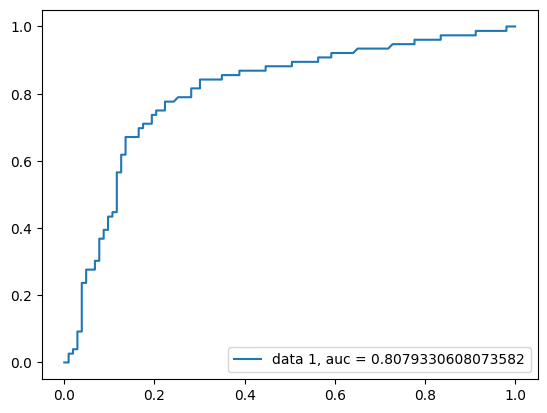

In [ ]:
y_pred_proba = gnb.predict_proba(X_test)[::,1]
fp,tp, _ = met.roc_curve(y_test, y_pred_proba)
auc = met.roc_auc_score(y_test, y_pred_proba)
plt.plot(fp,tp,label="data 1, auc = "+str(auc))
plt.legend(loc=4)
plt.show()

Terlihat bahwa akurasi berada pada kisaran 74%, precision pada 68% dan AUC = 79,5%. Ini umumnya masih dianggap belum cukup baik. Kita coba untuk meningkatkan unjuk kerja model kita di langkah berikutnya

## Meningkatkan Unjuk Kerja Model

In [ ]:

df_train1 = pd.read_csv("/titanic_train.csv")
df_train1 = df_train1.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
df_train1.replace(sex, inplace = True)
df_train1['Embarked'].fillna('S', inplace = True)
df_train1.replace(embarked, inplace = True)
df_train1.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
5,0,3,0,NaN,0,0,8.4583,2
6,0,1,0,54.0,0,0,51.8625,0
7,0,3,0,2.0,3,1,21.0750,0
8,1,3,1,27.0,0,2,11.1333,0
9,1,2,1,14.0,1,0,30.0708,1


In [ ]:
df_train = pd.read_csv("/titanic_train.csv")
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
# melihat data yg NaN atau yg kosong
df_train1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [ ]:
df_train = pd.read_csv("/titanic_train.csv")
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
# mencari rata-rata umur pria dan wanita
pria = df_train1['Age'].loc[df_train1['Sex'] == 0].mean()
wanita = df_train1['Age'].loc[df_train1['Sex'] == 1].mean()
print('Pria : ', pria, 'wanita : ', wanita)

Pria :  30.72664459161148 wanita :  27.915708812260537


Sekarang kita bisa mengisi example yg nilai usianya masih kosong dgn kedua angka rata-rata di atas :

In [ ]:
df_train1['Age'].loc[(df_train1['Sex'] == 0) & (df_train1['Age'].isnull() == True)] = 30.725
df_train1['Age'].loc[(df_train1['Sex'] == 1) & (df_train1['Age'].isnull() == True)] = 27.914

<ipython-input-65-66dc9968a9f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train1['Age'].loc[(df_train1['Sex'] == 0) & (df_train1['Age'].isnull() == True)] = 30.725
<ipython-input-65-66dc9968a9f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train1['Age'].loc[(df_train1['Sex'] == 1) & (df_train1['Age'].isnull() == True)] = 27.914


In [ ]:
# melihat data yg NaN atau yg kosong
df_train1['Age'].isnull().sum()

0

<Axes: >

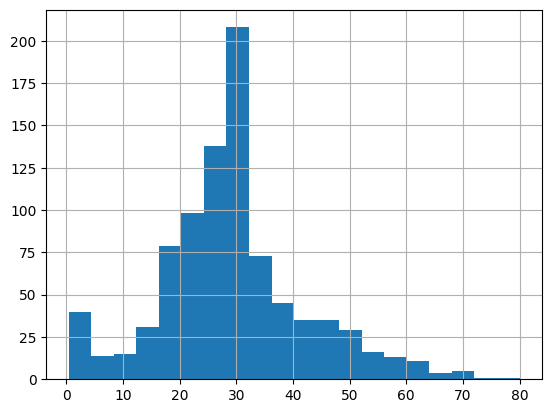

In [ ]:
df_train1['Age'].hist(bins = 20)

<Axes: >

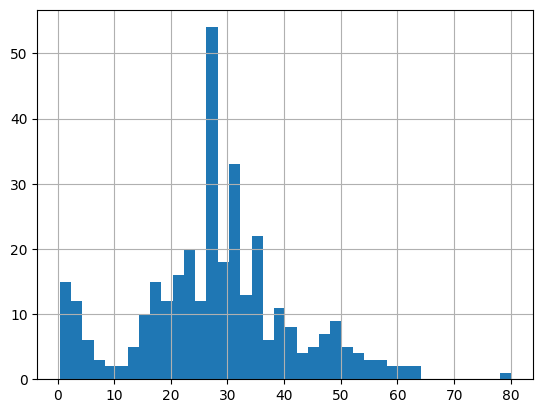

In [ ]:
df_train1['Age'].loc[df_train1['Survived'] == 1].hist(bins=40)

Kelompok-kelompok usia ini kita simpan di sebauh feature baru bernama "KelompokUmur" dan kodenya di "KelompokUmurKode" :

In [ ]:
umur = [0,5,15,25,30,35,45,50,200]
umur_label = ['0-5', '5-15', '15-25', '25-30', '30-35', '35-45', '45-50', '>50']
kelompok_umur = pd.cut(df_train1['Age'], umur, labels=umur_label)
df_train1['KelompokUmur'] = kelompok_umur
df_train1['KelompokUmurKode'] = df_train1['KelompokUmur'].cat.codes
df_train1['KelompokUmur'].value_counts()

KelompokUmur
15-25    218
30-35    212
25-30    161
35-45    114
>50       64
0-5       44
5-15      39
45-50     39
Name: count, dtype: int64

<Axes: >

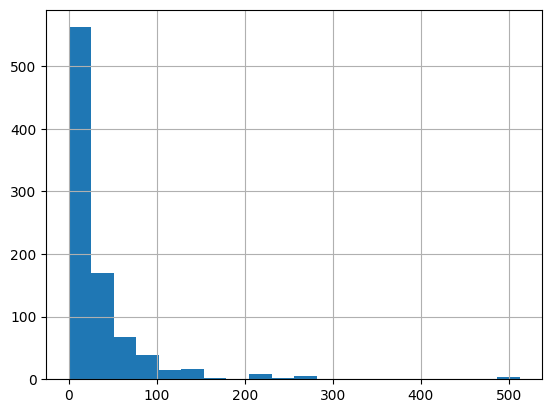

In [ ]:
df_train1['Fare'].hist(bins=20)

Kolom "Fare" (harga tiket) yg apabila kitaperhatikan, nilainya bervariasi sangat lebar.

Nampak bahwa sebagian besar harga tiket berada di bawah $100, sehingga sebagai permulaan kita bisa membagi penumpang ke dalam lima kelompok harga tiket di bawah angka tersebut. kita buat feature baru bernama "KelompokHarga" dan kodenya bernama "KelompokHargaKode" :

In [ ]:
harga = [0,10,30,35,80, 1000]
harga_label = ['0-10','10-30','30-35','35-80', '>80']
kelompok_harga = pd.cut(df_train1['Fare'], harga, labels=harga_label)
df_train1['KelompokHarga'] = kelompok_harga
df_train1['KelompokHargaKode'] = df_train1['KelompokHarga'].cat.codes
df_train1['KelompokHarga'].value_counts()

KelompokHarga
0-10     321
10-30    321
35-80    124
>80       74
30-35     36
Name: count, dtype: int64

In [ ]:
jumblahOrang = df_train1['SibSp'].astype(int) + df_train1['Parch'].astype(int) + 1
df_train1['JumblahOrang'] = jumblahOrang.astype(int)

Semua kolom di training dataset sudah kita revisi dan siap dipakai.sekarang utk melakaukan training model lagi.

In [ ]:
features1 = df_train1[['Pclass','Embarked','Sex','KelompokUmurKode','KelompokHargaKode','JumblahOrang']]
label1 = df_train1['Survived']
X_train, X_test, y_train, y_test = ms.train_test_split(features1, label1, test_size= 0.25, random_state = 0)

In [ ]:
gnb1 = nb.GaussianNB()
gnb1.fit(X_train, y_train)
y_prediksi = gnb1.predict(X_test)
accuracy = met.accuracy_score(y_test, y_prediksi)
precision = met.precision_score(y_test, y_prediksi)
print('Accuracy = ', accuracy, 'Precision = ', precision)

Accuracy =  0.8161434977578476 Precision =  0.7311827956989247


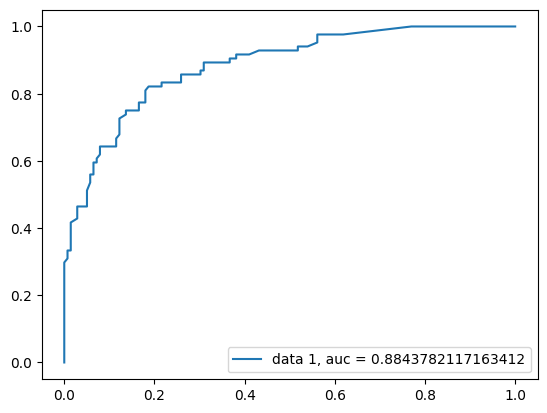

In [ ]:
y_pred_proba = gnb1.predict_proba(X_test)[::,1]
fp,tp, _ = met.roc_curve(y_test, y_pred_proba)
auc = met.roc_auc_score(y_test, y_pred_proba)
plt.plot(fp,tp,label="data 1, auc = "+str(auc))
plt.legend(loc=4)
plt.show()